## Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
wine_data=pd.read_csv('Wine_clust .csv')
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [112]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [113]:
#statisical information
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [114]:
#Selecting two columns for perform the Kmeans Clustering
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_wine_data=sc.fit_transform(wine_data)

In [115]:
sc_wine_data=pd.DataFrame(sc_wine_data,columns=wine_data.columns)
sc_wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


#### Kmeans Clustering

In [116]:
from sklearn.cluster import KMeans

In [117]:
X=sc_wine_data.iloc[:,[0,9]].values
X

array([[ 1.51861254,  0.25171685],
       [ 0.24628963, -0.29332133],
       [ 0.19687903,  0.26901965],
       [ 1.69154964,  1.18606801],
       [ 0.29570023, -0.31927553],
       [ 1.48155459,  0.73186953],
       [ 1.71625494,  0.08301456],
       [ 1.3086175 , -0.00349944],
       [ 2.25977152,  0.06138606],
       [ 1.0615645 ,  0.93517742],
       [ 1.3580281 ,  0.29929955],
       [ 1.38273339, -0.02512794],
       [ 0.92568536,  0.23441405],
       [ 2.16095032,  0.14790005],
       [ 1.70390229,  1.05629702],
       [ 0.77745356,  0.96978302],
       [ 1.60508109,  0.49395604],
       [ 1.02450655,  0.66698403],
       [ 1.46920194,  1.575381  ],
       [ 0.78980621,  0.01812906],
       [ 1.3086175 ,  0.25604255],
       [-0.08723191, -0.24141293],
       [ 0.87627476, -0.54421192],
       [-0.18605311, -0.48797782],
       [ 0.61686912, -0.66533151],
       [ 0.06099988, -0.63937732],
       [ 0.48098997, -0.11164194],
       [ 0.36981612, -0.47932642],
       [ 1.07391715,

In [118]:
#To find the optimum number of clusters by using Elboe method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

C:\Users\sumy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sumy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [119]:
wcss

[356.0,
 157.0736846363987,
 97.87911057496171,
 70.49960917918477,
 57.11862225986225,
 50.639020543478594,
 43.446454600615965,
 37.84449791589021,
 32.551530495560385,
 29.18664926902865]

Text(0, 0.5, 'WCSS')

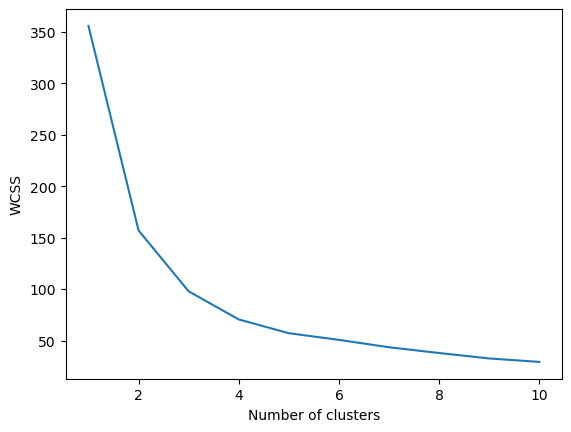

In [120]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [121]:
#We got the optimum number of clusters is 3 from the graph

In [122]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

C:\Users\sumy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


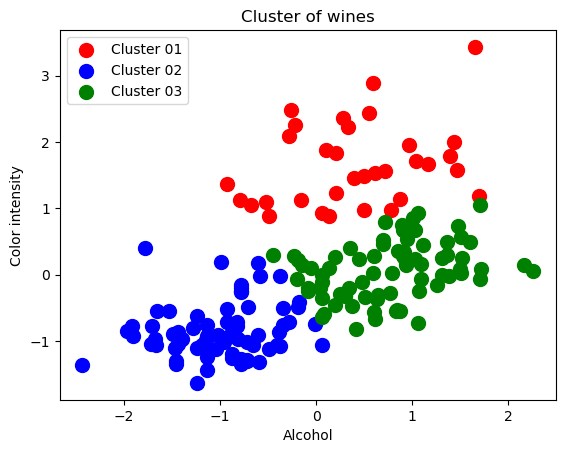

In [123]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 01')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 02')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 03')
plt.title('Cluster of wines')
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.legend()

In [124]:
from sklearn.metrics import silhouette_score

In [125]:
silhouette_score_avg=silhouette_score(X,y_kmeans)
silhouette_score_avg

0.46617258026747704

#### WE GET THE SILHOUETTE SCORE IS 0.46.SO MODEL IS AVERAGE.

#### Agglomerative Clustering

In [126]:
X=sc_wine_data.iloc[:,[0,9]].values
X

array([[ 1.51861254,  0.25171685],
       [ 0.24628963, -0.29332133],
       [ 0.19687903,  0.26901965],
       [ 1.69154964,  1.18606801],
       [ 0.29570023, -0.31927553],
       [ 1.48155459,  0.73186953],
       [ 1.71625494,  0.08301456],
       [ 1.3086175 , -0.00349944],
       [ 2.25977152,  0.06138606],
       [ 1.0615645 ,  0.93517742],
       [ 1.3580281 ,  0.29929955],
       [ 1.38273339, -0.02512794],
       [ 0.92568536,  0.23441405],
       [ 2.16095032,  0.14790005],
       [ 1.70390229,  1.05629702],
       [ 0.77745356,  0.96978302],
       [ 1.60508109,  0.49395604],
       [ 1.02450655,  0.66698403],
       [ 1.46920194,  1.575381  ],
       [ 0.78980621,  0.01812906],
       [ 1.3086175 ,  0.25604255],
       [-0.08723191, -0.24141293],
       [ 0.87627476, -0.54421192],
       [-0.18605311, -0.48797782],
       [ 0.61686912, -0.66533151],
       [ 0.06099988, -0.63937732],
       [ 0.48098997, -0.11164194],
       [ 0.36981612, -0.47932642],
       [ 1.07391715,

Text(0, 0.5, 'Euclidean Distance')

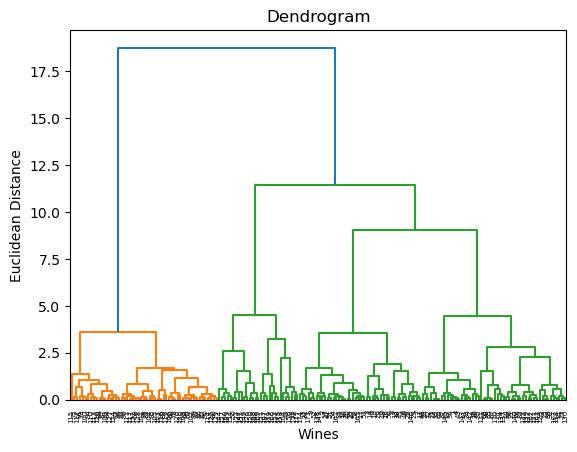

In [127]:
#Optimum number of clusters needed using dendrogram method
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X,method="ward"))#5 clusters because blue line,
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean Distance')

In [128]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [129]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2], dtype=int64)

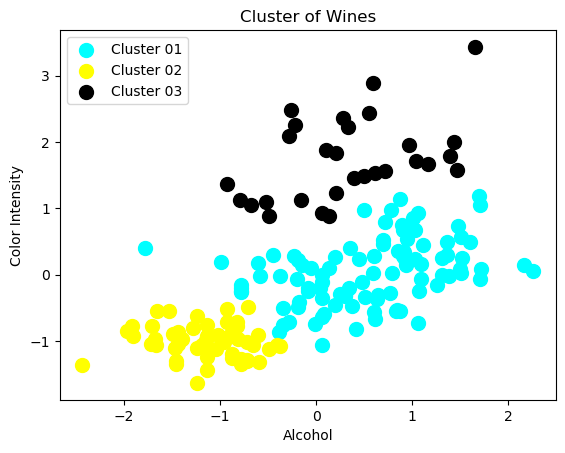

In [130]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='cyan',label='Cluster 01')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='yellow',label='Cluster 02')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='black',label='Cluster 03')
plt.title('Cluster of Wines')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend()

In [131]:
from sklearn.metrics import silhouette_score

In [132]:
silhouette_score=silhouette_score(X,y_hc)
silhouette_score

0.4223956744836914

#### WE GET SILHOUETTE SCORE IS 0.49.SO MODEL IS AVERAGE

#### DB SCAN Clustering

In [133]:
from sklearn.cluster import DBSCAN

In [134]:
dbscan=DBSCAN(eps=0.3,min_samples=3)
y_db=dbscan.fit_predict(X)

In [135]:
y_db

array([ 0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  2,  4, -1,  4,  6,  2,
        5,  3,  4,  1,  3, -1, -1,  3,  0,  0,  0,  1,  0,  5,  6,  4,  4,
       -1,  6,  1,  0,  0,  5, -1,  1], dtype=int64)

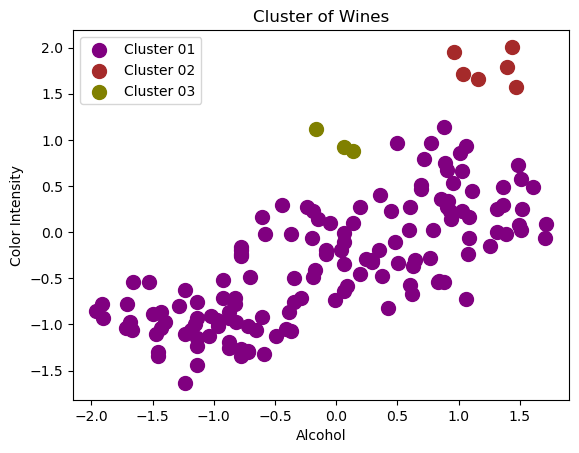

In [136]:
plt.scatter(X[y_db==0,0],X[y_db==0,1],s=100,c='purple',label='Cluster 01')
plt.scatter(X[y_db==1,0],X[y_db==1,1],s=100,c='brown',label='Cluster 02')
plt.scatter(X[y_db==2,0],X[y_db==2,1],s=100,c='olive',label='Cluster 03')
plt.title('Cluster of Wines')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend()


In [137]:
from sklearn.metrics import silhouette_score

In [138]:
silhouette_score=silhouette_score(X,y_db)
silhouette_score

0.09686857188971304

### Obervations
we get best value in Agglomerative clustering comparing to kmeans and DBSCAN